In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\shiva\Downloads\Google_Stock_Price_Train.csv")
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,7380500.0
1,1/4/2012,331.27,333.87,329.08,666.45,5749400.0
2,1/5/2012,329.83,330.75,326.89,657.21,6590300.0
3,1/6/2012,328.34,328.77,323.68,648.24,5405900.0
4,1/9/2012,322.04,322.29,309.46,620.76,11688800.0
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,623400.0
1254,12/27/2016,790.68,797.86,787.66,791.55,789100.0
1255,12/28/2016,793.70,794.23,783.20,785.05,1153800.0
1256,12/29/2016,783.33,785.93,778.92,782.79,744300.0


In [3]:
training_set = df.iloc[:,1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
training_set_scaled = scaler.fit_transform(training_set)

In [5]:
seq_length = 60
x_train = []
y_train = []
for i in range (60,1258):
    x_train.append(training_set_scaled[i-seq_length:i, 0])
    y_train.append(training_set_scaled[i,0])
    
x_train,y_train = np.array(x_train),np.array(y_train)

x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [7]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

In [8]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10

38/38 [==============================] - 12s 81ms/step - loss: 0.0335
Epoch 2/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0017
Epoch 3/10
38/38 [==============================] - 3s 77ms/step - loss: 0.0012
Epoch 4/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0012
Epoch 5/10
38/38 [==============================] - 4s 95ms/step - loss: 0.0012
Epoch 6/10
38/38 [==============================] - 3s 90ms/step - loss: 0.0013
Epoch 7/10
38/38 [==============================] - 8s 202ms/step - loss: 0.0012
Epoch 8/10
38/38 [==============================] - 2s 64ms/step - loss: 0.0011
Epoch 9/10
38/38 [==============================] - 7s 201ms/step - loss: 0.0011
Epoch 10/10
38/38 [==============================] - 3s 79ms/step - loss: 0.0011


In [10]:
inputs = training_set_scaled[-seq_length:]
inputs = np.reshape(inputs, (1, seq_length, 1))
predicted_price = model.predict(inputs)
predicted_price = scaler.inverse_transform(predicted_price)

print("Predicted Stock Price:", predicted_price[0, 0])

1/1 [==============================] - 3s 3s/step
Predicted Stock Price: 794.21454


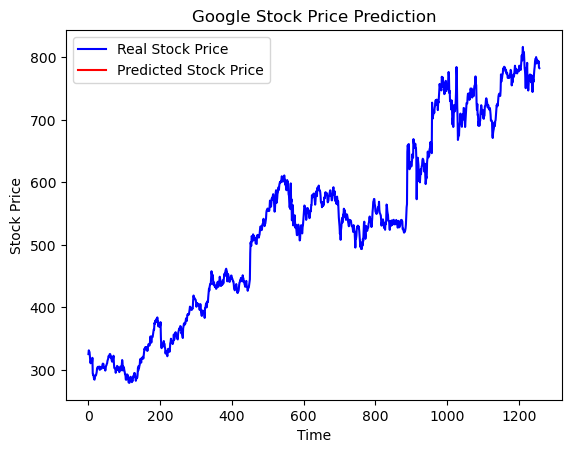

In [20]:
plt.plot(df['Open'].values, label='Real Stock Price', color='blue')
plt.plot(range(len(training_set)-1, len(training_set)+len(predicted_price)-1), predicted_price[0], label='Predicted Stock Price', color='red')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Normal RNN

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

np.random.seed(42)
seq_length = 10
data_size = 1000

data = np.random.random((data_size, seq_length, 1))  
labels = np.sum(data, axis=1)  

model = Sequential()

model.add(SimpleRNN(50, input_shape=(seq_length, 1)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(data, labels, epochs=10, batch_size=32)

sample_input = np.random.random((1, seq_length, 1))
prediction = model.predict(sample_input)

print("Sample Input:")
print(sample_input)
print("\nPredicted Output:")
print(prediction)

Epoch 1/10
32/32 [==============================] - 3s 6ms/step - loss: 6.2732
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7529
Epoch 3/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6680
Epoch 4/10
32/32 [==============================] - 0s 7ms/step - loss: 0.6425
Epoch 5/10
32/32 [==============================] - 0s 6ms/step - loss: 0.6072
Epoch 6/10
32/32 [==============================] - 0s 7ms/step - loss: 0.5460
Epoch 7/10
32/32 [==============================] - 0s 7ms/step - loss: 0.4256
Epoch 8/10
32/32 [==============================] - 0s 6ms/step - loss: 0.1962
Epoch 9/10
32/32 [==============================] - 0s 8ms/step - loss: 0.1292
Epoch 10/10
1/1 [==============================] - 0s 415ms/step
Sample Input:
[[[0.37364082]
  [0.3329121 ]
  [0.17615391]
  [0.60726667]
  [0.47662416]
  [0.86570099]
  [0.03210958]
  [0.64386793]
  [0.76294888]
  [0.75948657]]]

Predicted Output:
[[4.8870535]]


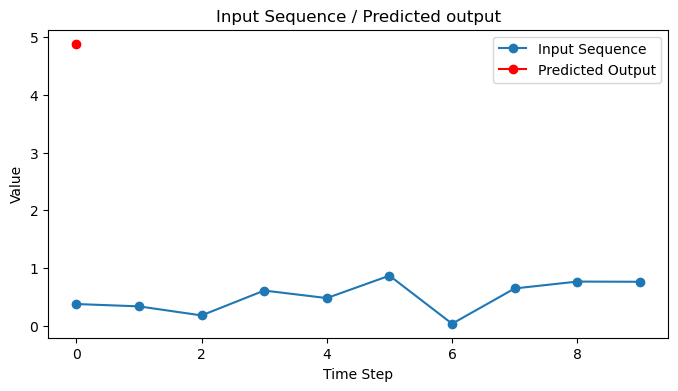

In [18]:
import matplotlib.pyplot as plt

# Plotting the input sequence
plt.figure(figsize=(8, 4))
plt.plot(sample_input[0], label='Input Sequence', marker='o')
plt.plot(prediction[0], label='Predicted Output', marker='o', color='red')
plt.title('Input Sequence / Predicted output')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()